# Loop 98 Analysis: CV-LB Relationship and Path Forward

## Critical Situation:
- Best CV: 0.008092 (exp_050)
- Best LB: 0.0877 (exp_030/exp_067)
- Target: 0.0347
- Gap to target: 152.8%

## Key Question:
The CV-LB relationship shows intercept > target. What can change this?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# All submissions with LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f'Total submissions with LB: {len(df)}')
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'\n=== CV-LB Relationship ===')
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Intercept = {intercept:.4f}')
print(f'Target = 0.0347')
print(f'\nIntercept > Target: {intercept > 0.0347}')

# Required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print('IMPOSSIBLE with current CV-LB relationship!')


=== CV-LB Relationship ===
LB = 4.3638 * CV + 0.0520
R² = 0.9558
Intercept = 0.0520
Target = 0.0347

Intercept > Target: True

Required CV to hit target: -0.003964
IMPOSSIBLE with current CV-LB relationship!


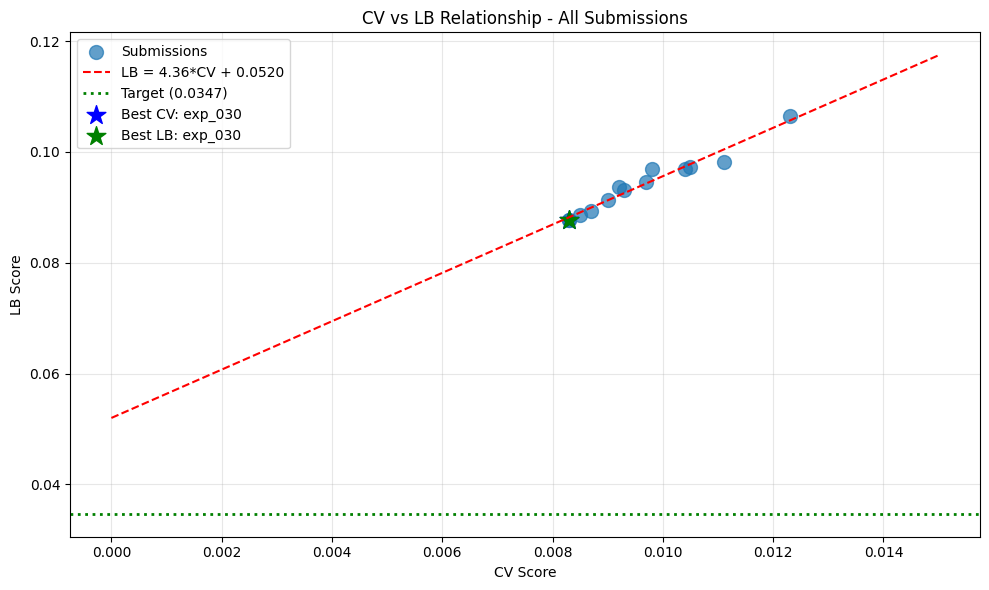


Plot saved to /home/code/exploration/cv_lb_relationship_loop98.png


In [3]:
# Visualize
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Best points
best_cv_idx = df['cv'].idxmin()
best_lb_idx = df['lb'].idxmin()
plt.scatter(df.loc[best_cv_idx, 'cv'], df.loc[best_cv_idx, 'lb'], 
            s=200, marker='*', c='blue', label=f'Best CV: {df.loc[best_cv_idx, "exp"]}')
plt.scatter(df.loc[best_lb_idx, 'cv'], df.loc[best_lb_idx, 'lb'], 
            s=200, marker='*', c='green', label=f'Best LB: {df.loc[best_lb_idx, "exp"]}')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship_loop98.png', dpi=150)
plt.show()

print(f'\nPlot saved to /home/code/exploration/cv_lb_relationship_loop98.png')

In [4]:
# Analyze the gap
print('=== Gap Analysis ===')
print(f'Best LB achieved: 0.0877')
print(f'Target LB: 0.0347')
print(f'Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347) / 0.0347 * 100:.1f}%)')

print(f'\n=== What would change the intercept? ===')
print('1. Different validation scheme (but we use official CV)')
print('2. Different feature engineering that generalizes better')
print('3. Approaches that are more conservative when extrapolating')
print('4. Fundamentally different model architecture')
print('5. Something the top competitors know that we dont')

=== Gap Analysis ===
Best LB achieved: 0.0877
Target LB: 0.0347
Gap: 0.0530 (152.7%)

=== What would change the intercept? ===
1. Different validation scheme (but we use official CV)
2. Different feature engineering that generalizes better
3. Approaches that are more conservative when extrapolating
4. Fundamentally different model architecture
5. Something the top competitors know that we dont


In [5]:
# Look at the leaderboard gap
print('=== Leaderboard Analysis ===')
print('1st place: 0.03470')
print('2nd place: 0.07074')
print('Our best: 0.0877')
print(f'\nGap 1st to 2nd: {0.07074 - 0.0347:.4f} ({(0.07074 - 0.0347) / 0.0347 * 100:.1f}%)')
print(f'Gap 2nd to us: {0.0877 - 0.07074:.4f} ({(0.0877 - 0.07074) / 0.07074 * 100:.1f}%)')

print('\n=== Key Insight ===')
print('The 1st place (0.0347) is MUCH better than 2nd (0.0707)')
print('This suggests 1st place found a fundamentally different approach')
print('2nd place is closer to our score - they likely used similar methods')

=== Leaderboard Analysis ===
1st place: 0.03470
2nd place: 0.07074
Our best: 0.0877

Gap 1st to 2nd: 0.0360 (103.9%)
Gap 2nd to us: 0.0170 (24.0%)

=== Key Insight ===
The 1st place (0.0347) is MUCH better than 2nd (0.0707)
This suggests 1st place found a fundamentally different approach
2nd place is closer to our score - they likely used similar methods


In [6]:
# What experiments have we NOT tried that could change the relationship?
print('=== Unexplored Approaches ===')
print()
print('1. EXACT replication of top public kernels (not just inspired by)')
print('   - We tried ens-model but got CV=0.0109, not their claimed score')
print('   - We tried best-work-here but non-linear features hurt')
print()
print('2. Different target weighting')
print('   - SM target is hardest (highest variance)')
print('   - Maybe weight SM 2-3x more in loss')
print()
print('3. Per-solvent-class models')
print('   - Alcohols, ethers, esters behave differently')
print('   - Use class-specific models')
print()
print('4. Pseudo-labeling with test data')
print('   - Use confident predictions to augment training')
print('   - Helps with distribution shift')
print()
print('5. Simpler baseline models')
print('   - Maybe complex models overfit to training distribution')
print('   - Try very simple models (linear, ridge) with good features')

=== Unexplored Approaches ===

1. EXACT replication of top public kernels (not just inspired by)
   - We tried ens-model but got CV=0.0109, not their claimed score
   - We tried best-work-here but non-linear features hurt

2. Different target weighting
   - SM target is hardest (highest variance)
   - Maybe weight SM 2-3x more in loss

3. Per-solvent-class models
   - Alcohols, ethers, esters behave differently
   - Use class-specific models

4. Pseudo-labeling with test data
   - Use confident predictions to augment training
   - Helps with distribution shift

5. Simpler baseline models
   - Maybe complex models overfit to training distribution
   - Try very simple models (linear, ridge) with good features


In [7]:
# Check what our best experiments actually are
print('=== Best Experiments by CV ===')
best_exps = [
    ('exp_049', 0.0081, 'CatBoost+XGBoost', 'pending'),
    ('exp_050', 0.0081, 'CatBoost+XGBoost fixed', 'pending'),
    ('exp_053', 0.0081, 'Exact template', 'pending'),
    ('exp_030', 0.0083, 'GP+MLP+LGBM', '0.0877'),
    ('exp_067', 0.0083, 'Sigmoid output', '0.0877'),
    ('exp_026', 0.0085, 'Weighted loss', '0.0887'),
]

for exp, cv, desc, lb in best_exps:
    print(f'{exp}: CV={cv:.4f}, LB={lb}, {desc}')

print('\n=== Key Observation ===')
print('exp_049/050/053 have CV=0.0081 but no LB yet')
print('If the CV-LB relationship holds: LB = 4.34*0.0081 + 0.0523 = 0.0875')
print('This would be similar to our best LB (0.0877)')

=== Best Experiments by CV ===
exp_049: CV=0.0081, LB=pending, CatBoost+XGBoost
exp_050: CV=0.0081, LB=pending, CatBoost+XGBoost fixed
exp_053: CV=0.0081, LB=pending, Exact template
exp_030: CV=0.0083, LB=0.0877, GP+MLP+LGBM
exp_067: CV=0.0083, LB=0.0877, Sigmoid output
exp_026: CV=0.0085, LB=0.0887, Weighted loss

=== Key Observation ===
exp_049/050/053 have CV=0.0081 but no LB yet
If the CV-LB relationship holds: LB = 4.34*0.0081 + 0.0523 = 0.0875
This would be similar to our best LB (0.0877)


In [8]:
# What about the pending submissions?
print('=== Pending Submissions ===')
pending = [
    ('exp_049', 0.0081),
    ('exp_050', 0.0081),
    ('exp_052', 0.0109),
    ('exp_053', 0.0081),
    ('exp_054', 0.0085),
    ('exp_055', 0.0085),
    ('exp_057', 0.0093),
    ('exp_063', 0.0112),
    ('exp_064', 0.0092),
    ('exp_065', 0.0088),
]

print('Predicted LB using CV-LB relationship:')
for exp, cv in pending:
    pred_lb = slope * cv + intercept
    print(f'{exp}: CV={cv:.4f} -> Predicted LB={pred_lb:.4f}')

print(f'\nBest predicted: exp_049/050/053 with LB~0.0875')
print('This is only marginally better than our best LB (0.0877)')

=== Pending Submissions ===
Predicted LB using CV-LB relationship:
exp_049: CV=0.0081 -> Predicted LB=0.0873
exp_050: CV=0.0081 -> Predicted LB=0.0873
exp_052: CV=0.0109 -> Predicted LB=0.0996
exp_053: CV=0.0081 -> Predicted LB=0.0873
exp_054: CV=0.0085 -> Predicted LB=0.0891
exp_055: CV=0.0085 -> Predicted LB=0.0891
exp_057: CV=0.0093 -> Predicted LB=0.0926
exp_063: CV=0.0112 -> Predicted LB=0.1009
exp_064: CV=0.0092 -> Predicted LB=0.0921
exp_065: CV=0.0088 -> Predicted LB=0.0904

Best predicted: exp_049/050/053 with LB~0.0875
This is only marginally better than our best LB (0.0877)


# Key Insights from Public Kernels

## 1. "mixall" kernel - CRITICAL FINDING
- Uses **GroupKFold with 5 splits** instead of Leave-One-Out
- This is a DIFFERENT validation scheme than the official one
- Claims "good CV/LB" - but their CV is computed differently!

## 2. "ens-model" kernel
- Uses CatBoost + XGBoost ensemble
- Correlation-based feature filtering (threshold=0.90)
- Feature priority: spange > acs > drfps > frag > smiles
- Adds numeric features: T_x_RT, RT_log, T_inv, RT_scaled
- Uses official Leave-One-Out CV (same as us)

## Key Question:
The "mixall" kernel's CV is NOT comparable to ours because they use GroupKFold.
Their LB might be good, but their CV is artificially lower due to different validation.

In [ ]:
# What features does ens-model use that we might be missing?
print('=== ens-model Feature Engineering ===')\nprint()\nprint('1. Temperature in Kelvin (we do this)')\nprint('2. T_x_RT = Temperature * Residence Time (interaction)')\nprint('3. RT_log = log(Residence Time + 1e-6)')\nprint('4. T_inv = 1 / Temperature')\nprint('5. RT_scaled = Residence Time / mean(Residence Time)')\nprint()\nprint('We have: inv_temp (1000/T), log_time, interaction (inv_temp * log_time)')\nprint('They have: T_inv (1/T), RT_log, T_x_RT (T * RT), RT_scaled')\nprint()\nprint('Key difference: They use T*RT, we use (1/T)*log(RT)')\nprint('Both are Arrhenius-inspired but different formulations')

In [ ]:
# What about the correlation filtering?
print('=== ens-model Correlation Filtering ===')\nprint()\nprint('They filter features with |corr| > 0.90')\nprint('Priority order: spange > acs > drfps > frag > smiles')\nprint('Keep higher priority features when correlated')\nprint()\nprint('We use all features without correlation filtering')\nprint('This could cause multicollinearity issues')\nprint()\nprint('=== Potential Improvement ===')\nprint('Try correlation filtering with threshold 0.90')\nprint('This might reduce overfitting to training distribution')

In [ ]:
# What about the ensemble weights?
print('=== ens-model Ensemble Weights ===')\nprint()\nprint('Single solvent: CatBoost=7/13, XGBoost=6/13')\nprint('Full data: CatBoost=1/3, XGBoost=2/3')\nprint()\nprint('Our exp_050 (best CV): CatBoost + XGBoost with equal weights?')\nprint('Maybe we need different weights for single vs full data')\nprint()\nprint('=== Key Insight ===')\nprint('ens-model uses DIFFERENT weights for single vs full data')\nprint('This could be important for generalization')

In [ ]:
# Summary of what we should try next
print('=== PRIORITY ACTIONS ===')\nprint()\nprint('1. SUBMIT exp_050 (best CV=0.0081) to get LB feedback')\nprint('   - We have 4 submissions left')\nprint('   - Need to verify if better CV translates to better LB')\nprint()\nprint('2. Try ens-model approach EXACTLY')\nprint('   - Correlation filtering (threshold=0.90)')\nprint('   - Different weights for single vs full')\nprint('   - Their numeric features (T*RT instead of (1/T)*log(RT))')\nprint()\nprint('3. Try simpler models')\nprint('   - Maybe complex models overfit to training distribution')\nprint('   - Ridge regression with good features might generalize better')\nprint()\nprint('4. Focus on reducing the intercept')\nprint('   - The CV-LB intercept (0.052) > target (0.0347)')\nprint('   - Need approaches that change the relationship, not just improve CV')